### Vahid Foruzanmehr - FORV26018703 - tp1 - inf600f - Traitement d’images

## import

In [3]:
import numpy as np
import skimage
import imageio as iio
import matplotlib.pyplot as plt
# Ajoutez d'autres modules au besoin


# Exercice 1 : Convolution (5 pts)
L'image à utiliser pour cet exercice est `tp1_ex1.tif`.

Développez une fonction Python qui effectue une convolution entre une image en niveaux de gris et un noyau de convolution. Les deux matrices (image et noyau) sont données en entrée de votre fonction. Testez votre convolution avec l'image `tp1_ex1.tif` et avec 3 noyaux de convolution différents: (1) un filtre moyenneur de taille 5x5, (2) un filtre gaussien d'écart-type $\sigma=2$, et (3) un filtre de Sobel horizontal.

La fonction doit recevoir un argument optionnel pour contrôler le type de remplissage pour les conditions de frontières. Les deux méthodes à implémenter sont un remplissage de zéro (*zero padding*, option par défaut) et un remplissage de type miroir (*mirror padding*).

Affichez les images originales et les images filtrées pour chaque noyau. Assurez-vous que les valeurs des pixels des images filtrées soient de même type que l'image originale (par exemple, si l'image originale est en `uint8`, l'image filtrée doit aussi être en `uint8`). Enregistrez les images filtrées dans un fichier `.png` pour les inclure dans le fichier compressé `.zip` de votre remise et dans votre rapport Jupyter.

**Note** : Pour cet exercice, vous devez écrire votre propre fonction de convolution. Vous ne pouvez pas utiliser de fonction de convolution prédéfinie de bibliothèques comme OpenCV, scikit-image ou scipy

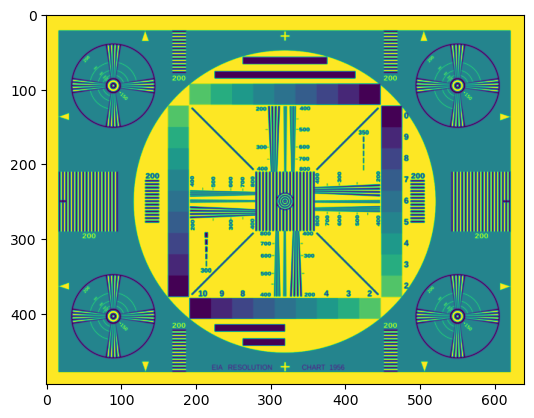

In [5]:
image_q1 = iio.v3.imread('tp1_ex1.tif')
plt.imshow(image_q1)

## Étape 1: fonction pour padding : zero et miroir

In [7]:
def padding_miroir(img_array, padding_largeur) -> np.ndarray:
  """
  Cette fonction ajoute une bordure miroir à une image en niveaux de gris
  en fonction d'une largeur de padding spécifiée.

  Paramètres :
    img_array (numpy.ndarray) : Tableau 2D d'entrée (image en niveaux de gris).
    pad_height (int) : Nombre de lignes à ajouter en haut et en bas.
    pad_width (int) : Nombre de colonnes à ajouter à gauche et à droite.
  Renvoie :
    numpy.ndarray : Image avec bordures ajoutées.
  """

  pad_gauche = img_array[:, :padding_largeur][:, ::-1]
  pad_droit = img_array[:, -padding_largeur:][:, ::-1]
  pad_g_d = np.concatenate((pad_gauche, img_array, pad_droit), axis=1)

  pad_haut = pad_g_d[:padding_largeur, :][::-1, :]
  pad_bas = pad_g_d[-padding_largeur:, :][::-1, :]
  padding = np.concatenate((pad_haut, pad_g_d, pad_bas), axis=0)

  return padding

In [8]:
def padding_zero(img_array, padding_largeur):
  """
  Effectue un remplissage de l'image avec des zéros
  sur un matrix de l image sans utiliser np.pad.

  Paramètres :

    img_array (numpy.ndarray) : Tableau 2D d'entrée (image en niveaux de gris).
    padding_largeur (int) : Nombre de lignes et de colonnes à ajouter de chaque côté.

  Returns:
    numpy.ndarray: Zero-padded image.
  """
  original_height = img_array.shape[0]
  original_width = img_array.shape[1]

  new_height = original_height + 2 * padding_largeur
  new_width = original_width + 2 * padding_largeur

  padded_img = np.zeros((new_height, new_width), dtype=img_array.dtype)

  padded_img[padding_largeur:padding_largeur + original_height,
            padding_largeur:padding_largeur + original_width] = img_array

  return padded_img


## Étape 2: sous-fonction pour convolution

In [10]:
def get_pixel(image: np.ndarray, x: int, y: int, padding: str = 'zero') -> float:
  """Gère les conditions aux limites et le comportement du remplissage."""
  if 0 <= x < image.shape[1] and 0 <= y < image.shape[0]:
    return image[y, x]
  return 0

In [11]:
def inner_convolution(image: np.ndarray, noyau: np.ndarray, m, n, centre_noyau, padding: str = 'zero') -> float:
  """
  Effectue une convolution locale entre une image et un noyau centré
  sur un point donné avec une option de remplissage.

  Paramètres :
    image (numpy.ndarray) : Tableau 2D représentant l'image.
    noyau (numpy.ndarray) : Tableau 2D représentant le noyau de convolution.
    m, n (int) : Coordonnées du point central sur lequel appliquer la convolution.
    centre_noyau (int) : Indice du centre du noyau.
    padding (str, optionnel) : Méthode de remplissage, 'zero' par défaut.

  Return :
    float : Valeur résultante de la convolution locale.
  """
  sum_valeur = 0
  noyau_hauteur = noyau.shape[0]
  noyau_largeur = noyau.shape[1]
  for j in range(noyau_hauteur):
    for i in range(noyau_largeur):
      x = m + i - centre_noyau
      y = n + j - centre_noyau

      pixel_valeur = get_pixel(image, x, y, padding)
      sum_valeur += noyau[j, i] * pixel_valeur

  return sum_valeur

## Étape 3: sous-fonction pour convolution

In [13]:
def convolution(image:np.ndarray, noyau:np.ndarray, padding:str='zero') -> np.ndarray:
  """Convolution d'une image en niveaux de gris avec un noyau de convolution.
  Paramètres
  ----------
  image : ndarray
      Image en niveaux de gris de taille (H, W)
  noyau : ndarray
      Noyau de convolution de taille (h, w)
  padding : str, optionnel
      Type de remplissage pour les conditions de frontière.
      'zero' pour un remplissage de zéro, 'mirror' pour un remplissage miroir.
  Retour
  -------
  ndarray
      Image convoluée de taille (H, W)
  """

  noyau_largeur = noyau.shape[0]
  padding_largeur = noyau_largeur // 2
  h = np.zeros(image.shape)

  if padding == 'zero' :
    img = padding_zero(image, padding_largeur)
    print('zero')
  elif padding == 'miroir':
    img = padding_miroir(image, padding_largeur)
    print('miroir')

  for n in range(image.shape[0]):
    for m in range(image.shape[1]):
      h[n,m] = inner_convolution(image, noyau, m, n, padding_largeur)

  return h

## exemple sur image tp1_ex1.tif avec  3 noyaux de convolution différents
### 1 : un filtre moyenneur de taille 5x5,
### 2 : un filtre gaussien d'écart-type  σ=2,
### 3 : un filtre de Sobel horizontal

## Étape 4: defini fonction pour produit filtre moyenneur et filtre gaussien

In [16]:
def filter_moyenneur(kernel_size):
  kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)
  return kernel

In [17]:
def gaussien(sigma, k):
  filter = np.zeros((k,k))

  for i in range(0, k):
    for j in range(0, k):
      x = i - k // 2
      y = j - k // 2
      filter[i][j] = (1 / (2 * np.pi * sigma) ) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
  return filter


### Exemples les noyau

In [19]:
matrix_moyenneur = filter_moyenneur(5)

In [20]:
matrix_gaussien = gaussien(2,5)

In [21]:
matrix_sobel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

### les filters


In [23]:
filter_moyenneur = convolution(image_q1, matrix_moyenneur, "miroir")

miroir


In [24]:
filter_moyenneur_zero = convolution(image_q1, matrix_moyenneur, "zero")

zero


In [25]:
# 2 : un filtre gaussien d'écart-type σ=2
filter_gauss = convolution(image_q1, gaussien(2, 5), "miroir")

miroir


In [26]:
filter_gauss_zero = convolution(image_q1, gaussien(2, 5), "zero")

zero


In [27]:
filter_sobel = convolution(image_q1, matrix_sobel, "miroir")

miroir


In [28]:
filter_sobel_zero = convolution(image_q1, matrix_sobel, "zero")

zero


## Étape 6 : Affichage de plot

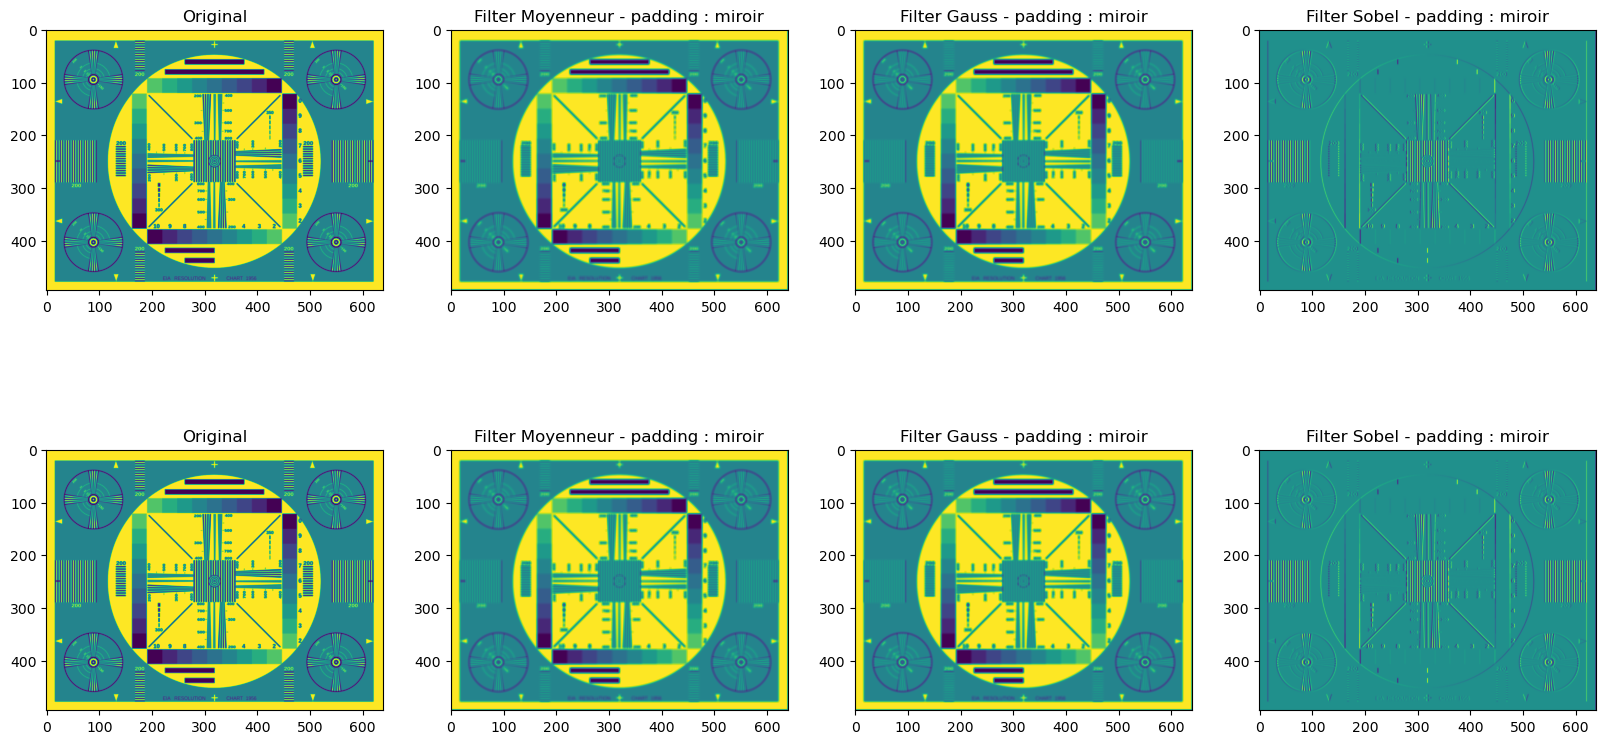

In [30]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.imshow(image_q1)
plt.title('Original')

plt.subplot(2, 4, 2)
plt.imshow(filter_moyenneur)
plt.title('Filter Moyenneur - padding : miroir')

plt.subplot(2, 4, 3)
plt.imshow(filter_gauss)
plt.title('Filter Gauss - padding : miroir')

plt.subplot(2, 4, 4)
plt.imshow(filter_sobel)
plt.title('Filter Sobel - padding : miroir')

plt.subplot(2, 4, 5)
plt.imshow(image_q1)
plt.title('Original')

plt.subplot(2, 4, 6)
plt.imshow(filter_moyenneur)
plt.title('Filter Moyenneur - padding : miroir')

plt.subplot(2, 4, 7)
plt.imshow(filter_gauss)
plt.title('Filter Gauss - padding : miroir')

plt.subplot(2, 4, 8)
plt.imshow(filter_sobel)
plt.title('Filter Sobel - padding : miroir')

plt.savefig('filters_comparison.png', bbox_inches='tight')  

plt.show()


## Étape 7 : Enregistrement sur fichier png

In [32]:
# Convertir filter_moyenneur en un tableau NumPy
image_filter_moyenneur = np.array(filter_moyenneur)

# S'assurer que les données sont au format uint8 (valeurs entre 0 et 255)
if image_filter_moyenneur.dtype != np.uint8:
    image_filter_moyenneur = (255 * (image_filter_moyenneur - np.min(image_filter_moyenneur)) 
                              / (np.max(image_filter_moyenneur) 
                              - np.min(image_filter_moyenneur))).astype(np.uint8)

# Enregistrer l'image traitée
iio.imwrite('image_filter_moyenneur_miroir.png', image_filter_moyenneur)

In [33]:
# Convertir filter_moyenneur en un tableau NumPy
image_filter_gaussien = np.array(filter_gauss)

# S'assurer que les données sont au format uint8 (valeurs entre 0 et 255)
if image_filter_gaussien.dtype != np.uint8:
    image_filter_gaussien = (255 * (image_filter_gaussien - np.min(image_filter_gaussien)) 
                              / (np.max(image_filter_gaussien) 
                              - np.min(image_filter_gaussien))).astype(np.uint8)

# Enregistrer l'image traitée
iio.imwrite('image_filter_gaussien_miroir.png', image_filter_gaussien)

In [34]:
# Convertir filter_moyenneur en un tableau NumPy
image_filter_sobel = np.array(filter_sobel)

# S'assurer que les données sont au format uint8 (valeurs entre 0 et 255)
if image_filter_sobel.dtype != np.uint8:
    image_filter_sobel = (255 * (image_filter_sobel - np.min(image_filter_sobel)) 
                              / (np.max(image_filter_sobel) 
                              - np.min(image_filter_sobel))).astype(np.uint8)

# Enregistrer l'image traitée
iio.imwrite('image_filter_sobel_miroir.png', image_filter_sobel)

# Exercice 2 : Code-barres mystère (5 pts)
- Vous devez utiliser l'image `tp1_ex2.png` pour cet exercice.



*L'image à utiliser pour cet exercice est `tp1_ex2.png`.*

Vous avez trouvé un code-barres abandonné à l'UQAM. Ce code-barres s'est décollé d'un livre emprunté à la bibliothèque. Vous souhaitez identifier le livre auquel ce code appartient.

La norme suivie pour créer le code-barres est *Codabar* (<https://en.wikipedia.org/wiki/Codabar>), une vieille convention utilisée dans les bibliothèques. Pour cette convention, les symboles `[0-9]`et `$`, `-` sont représentés par 4 lignes et 3 espaces. Les lignes/espaces peuvent être larges ou étroites, et chaque symbole d'un code-barres est séparé par un espace étroit. Voici la correspondance entre les patrons de barres-espaces et chaque symbole possible pour cet exercice.

|Symbole|Barres|Espaces|
|--|---|---|
|0|0001|001|
|1|0010|001|
|2|0001|010|
|3|1000|100|
|4|0100|001|
|5|1000|001|
|6|0001|100|
|7|0010|100|
|8|0100|100|
|9|1000|010|
|-|0010|010|
|$|0100|010|

**Note** : "0" indique une barre ou un espace mince, et "1" indique une barre ou un espace large. Par exemple, pour le symbole `"0"` le code barre suivant sera utilisé :

- Développez un décodeur de code-barres qui reçoit une image, extrait le niveau d'intensité le long d'une ligne et qui retrouve ensuite l'identifiant ISBN-13 de ce livre.
- Utilisez votre algorithme pour identifier l'ISBN associé au code-barres de l'image fournie.
- Quels sont le titre et les auteurs de ce livre (*recherchez l'ISBN dans Google*) ?

## Étape 1: lire fichier .png

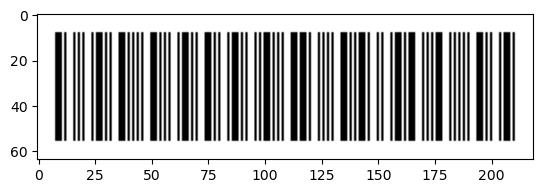

In [38]:
image = iio.v3.imread('./tp1_ex2.png')
plt.imshow(image, cmap='gray')

In [39]:
img_col = image.shape[1]
white = []
black = []

## Étape 2: Recadrer l'image pour supprimer les zones blanches en haut et en bas.

In [41]:
img_row = image.shape[0] // 2
img = image[img_row : img_row + 1, :]

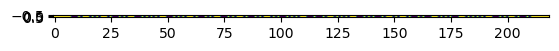

In [42]:
plt.imshow(img)

## Étape 3 : Décompter les pixels noirs et blancs

Nous procéderons au comptage des pixels noirs et blancs dès l'apparition d'une couleur opposée.

In [44]:
white_flag = True
count = 0
for i in range (0 , img_col):
  pixel = img[0, i]
  if pixel == 255 and white_flag:
    count += 1
  elif pixel == 255 and (not white_flag):
    black.append(count)
    count = 1
    white_flag = True
  elif pixel == 0 and (not white_flag):
    count += 1
  else :
    white.append(count)
    count = 1
    white_flag = False



In [45]:
# Éliminer la première partie située à l'extérieur du code-barres
white = white[1 : ]

## Étape 4: Convertir une liste en une chaîne de caractères composée de 0 et 1

In [47]:
res_black = ""

min_black = min(black)
for i in range(len(black)):
  if black[i] == min_black :
    res_black = res_black + '0'
  else:
    res_black = res_black + '1'


In [48]:
res_black

'10000010010000100001001000100001000110000010010000101000100000100010'

## Étape 5 : Insérer la chaîne de caractères dans une liste avec 4 caractères par élément pour les noirs et 3 caractères par élément pour les blancs

In [50]:
array_res_black = [res_black[i:i+4] for i in range(0, len(res_black), 4)]
print(array_res_black)


['1000', '0010', '0100', '0010', '0001', '0010', '0010', '0001', '0001', '1000', '0010', '0100', '0010', '1000', '1000', '0010', '0010']


In [51]:
res_white = ""
min_white = min(white)
for i in range(len(white)):
  if white[i] == min_white :
    res_white = res_white + '0'
  else:
    res_white = res_white + '1'


In [52]:
array_res_white = []
i = 0
while i < len(res_white):
  array_res_white.append(res_white[i:i+3])
  i += 4

print(array_res_white)


['010', '100', '100', '010', '010', '010', '100', '100', '001', '010', '010', '001', '100', '100', '100', '010', '100']


## Étape 6 : Fusionner les listes de noirs et de blancs

Pour chaque élément dans la liste des noirs, associer un élément correspondant dans la liste des blancs

In [54]:
combined_array = []
for i in range(min(len(array_res_black), len(array_res_white))):
  combined_array.append((array_res_black[i], array_res_white[i]))

print(combined_array)


[('1000', '010'), ('0010', '100'), ('0100', '100'), ('0010', '010'), ('0001', '010'), ('0010', '010'), ('0010', '100'), ('0001', '100'), ('0001', '001'), ('1000', '010'), ('0010', '010'), ('0100', '001'), ('0010', '100'), ('1000', '100'), ('1000', '100'), ('0010', '010'), ('0010', '100')]


## Étape 7 : Créer une map(dictionary) de code-barres

In [56]:
codabar_dict = {
    ('0001', '001'): '0',
    ('0010', '001'): '1',
    ('0001', '010'): '2',
    ('1000', '100'): '3',
    ('0100', '001'): '4',
    ('1000', '001'): '5',
    ('0001', '100'): '6',
    ('0010', '100'): '7',
    ('0100', '100'): '8',
    ('1000', '010'): '9',
    ('0010', '010'): '-',
    ('0100', '010'): '$',
    ('1110','000'): '.',
}

## Étape 8 : Déchiffrer les symboles à partir des barres et espaces

In [58]:
decoded_symbols = []
for bars, spaces in combined_array:
    key = (bars, spaces)
    symbol = codabar_dict.get(key, '-')
    decoded_symbols.append(symbol)


## Étape 9 : Assembler les symboles décodés en une chaîne de caractères

In [60]:
decoded = ''.join(decoded_symbols[i] for i in range(len(decoded_symbols)))
decoded

'978-2-7609-4733-7'

In [61]:
print(f"The decoded ISBN is: {decoded}")


The decoded ISBN is: 978-2-7609-4733-7


## Step 10 : Search for the Book

#### Écrivain public(L')
#### ISBN-13: 9782760947337

#### ISBN-10: 2760947335

#### Author: DUCHESNE MICHEL

#### Binding: Paperback

#### Publisher: LEMEAC

#### Published: 2016